In [ ]:
#install google play scraper
get_ipython().system('pip install google-play-scraper')

In [ ]:
pip install emoji

In [ ]:
pip install contractions

In [ ]:
pip install textstat


In [ ]:
pip install demoji


In [ ]:
from google_play_scraper import app
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')
import warnings
warnings.filterwarnings(action='ignore')
import emoji
import contractions
import re
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import RegexpTokenizer
from textstat import flesch_reading_ease
import demoji

In [ ]:
#df.to_csv('threads_reviews.csv', index=False)
df=pd.read_csv('Twitter_reviews.csv')
df.head()


,content,Sentiment
0,"we used to be a society, but the elon musk hap...",0
1,"Ever since Elon took over Twitter, the app has...",0
2,I can't load any picture in the app. Please help.,1
3,The owner is a child who broke the app and is ...,-1
4,Elon is poopoo (videos don't play properly and...,-1


In [ ]:
#show count of  null or missing values in each column
df.isnull().sum()


reviewId                     0
userName                     2
userImage                    1
content                     18
score                        1
thumbsUpCount                1
reviewCreatedVersion     52555
at                           1
replyContent            231933
repliedAt               231933
appVersion               52555
dtype: int64

In [ ]:
#show number of duplicated rows
df.duplicated().sum()

0

In [ ]:
#Print out the most frequent value in the "country" and "children" columns
print('The most frequent App version is : ', df["appVersion"].mode().iloc[0])

The most frequent App version is :  9.65.6-release.0


In [ ]:
#Replace the missing value in "children" and "country" columns with the most frequent values.
df["appVersion"].fillna(df["appVersion"].mode().iloc[0], inplace = True)

In [ ]:
#show count of  null or missing values in each column
df.isnull().sum()

reviewId                     0
userName                     2
userImage                    1
content                     18
score                        1
thumbsUpCount                1
reviewCreatedVersion     52555
at                           1
replyContent            231933
repliedAt               231933
appVersion                   0
dtype: int64

In [ ]:
#Delete unwanted columns
df.drop(['reviewId', 'userName','userImage','thumbsUpCount','reviewCreatedVersion','at','replyContent','repliedAt'], axis = 1, inplace = True)

KeyError: ignored

In [ ]:
df.head()

,content,score,appVersion
0,"we used to be a society, but the elon musk hap...",1.0,9.65.6-release.0
1,"Ever since Elon took over Twitter, the app has...",1.0,9.98.0-release.0
2,I can't load any picture in the app. Please help.,5.0,9.98.0-release.0
3,The owner is a child who broke the app and is ...,1.0,8.58.0-release.00
4,Elon is poopoo (videos don't play properly and...,2.0,9.98.0-release.0


In [ ]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')
nltk.download('words')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [ ]:
sid = SentimentIntensityAnalyzer()
words = set(nltk.corpus.words.words())


In [ ]:
# Assuming you have already imported the necessary libraries and defined df

# Fill missing values in the 'content' column with an empty string
df['content'].fillna('', inplace=True)

# Perform sentiment analysis
positive_scores = []
negative_scores = []
neutral_scores = []
compound_scores = []

for index, row in df.iterrows():
    contents = row['content']

    sentiment_scores = sid.polarity_scores(contents)

    positive_score = sentiment_scores['pos']
    negative_score = sentiment_scores['neg']
    neutral_score = sentiment_scores['neu']
    compound_score = sentiment_scores['compound']

    positive_scores.append(positive_score * 100)
    negative_scores.append(negative_score * 100)
    neutral_scores.append(neutral_score * 100)
    compound_scores.append(compound_score * 100)


In [ ]:
df['POSITIVE SCORE'] = positive_scores
df['NEGATIVE SCORE'] = negative_scores
df['NEUTRAL SCORE'] = neutral_scores
df['COMPOUND SCORE'] = compound_scores

In [ ]:
df.head()


,content,score,appVersion,POSITIVE SCORE,NEGATIVE SCORE,NEUTRAL SCORE,COMPOUND SCORE
0,"we used to be a society, but the elon musk hap...",1.0,9.65.6-release.0,0.0,0.0,100.0,0.00
1,"Ever since Elon took over Twitter, the app has...",1.0,9.98.0-release.0,0.0,0.0,100.0,0.00
2,I can't load any picture in the app. Please help.,5.0,9.98.0-release.0,41.7,0.0,58.3,61.24
3,The owner is a child who broke the app and is ...,1.0,8.58.0-release.00,0.0,9.3,90.7,-61.24
4,Elon is poopoo (videos don't play properly and...,2.0,9.98.0-release.0,0.0,17.1,82.9,-48.29


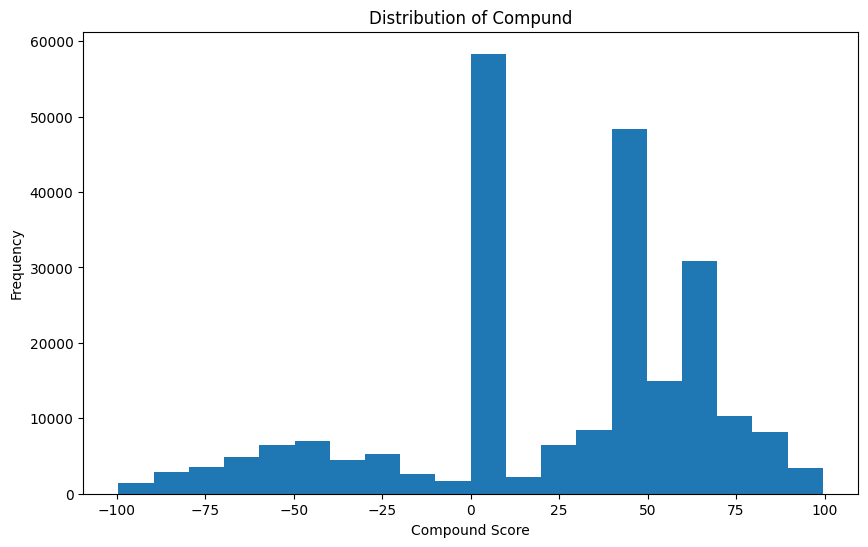

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(df['COMPOUND SCORE'], bins=20)
plt.xlabel('Compound Score')
plt.ylabel('Frequency')
plt.title('Distribution of Compund')
plt.show()


In [ ]:
positive_threshold = 0.2
negative_threshold = -0.2

df['Sentiment']= ''

for index, row in df.iterrows():
    compound_score = row['COMPOUND SCORE']

    if compound_score > positive_threshold:
        df.at[index, 'Sentiment'] = 'Positive'
    elif compound_score < negative_threshold:
            df.at[index, 'Sentiment'] = 'Negative'
    else:
                df.at[index, 'Sentiment'] = 'Neutral'

In [ ]:
df.sample(5)


,content,score,appVersion,POSITIVE SCORE,NEGATIVE SCORE,NEUTRAL SCORE,COMPOUND SCORE,Sentiment
5562,my app doesnt work anymore for no reason since...,1.0,9.65.6-release.0,0.0,7.8,92.2,-15.31,Negative
112084,I am chaotic neutral. This is paradise.,5.0,9.65.1-release.0,36.8,28.1,35.1,25.00,Positive
55671,Good,5.0,9.78.0-release.0,100.0,0.0,0.0,44.04,Positive
71625,👍👍,5.0,9.72.0-release.0,0.0,0.0,100.0,0.00,Neutral
3188,Please bring back video setting where you can ...,3.0,9.65.6-release.0,18.7,0.0,81.3,31.82,Positive


In [ ]:
df['Sentiment'].value_counts()

Positive    135441
Neutral      56175
Negative     40320
Name: Sentiment, dtype: int64

In [ ]:
dff=df[['content','Sentiment']]


In [ ]:
demoji.download_codes()


In [ ]:
def remove_emojis(text):
    return demoji.replace(text, '')

In [ ]:
#Applying the remove_emojis function
dff['content'] = dff['content'].apply(remove_emojis)

In [ ]:
dff

,content,Sentiment
0,"we used to be a society, but the elon musk hap...",Neutral
1,"Ever since Elon took over Twitter, the app has...",Neutral
2,I can't load any picture in the app. Please help.,Positive
3,The owner is a child who broke the app and is ...,Negative
4,Elon is poopoo (videos don't play properly and...,Negative
...,...,...
231931,Better use Twitter through any browser. I woul...,Positive
231932,i can't change my profile whyyyyyyyyyyy,Neutral
231933,Why i got notifications from someone that i do...,Neutral
231934,This is real rubbish it can't even be downloaded,Neutral


In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
corpus = []
ps=PorterStemmer()
for i in range(len(dff)):
    #Removing special charcters from text
    review = re.sub('[^a-zA-Z]', ' ',dff['content'][i])
    # Converting text to lowercase
    review = review.lower()
    #splitting text
    review = review.split()
    # stemming and remove stop words
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    #joining  the words into a complete text
    review = ' '.join(review)
    #Appending text into the list corpus
    corpus.append(review)

In [ ]:
#convert labels into numerical format
dff['Sentiment'] = dff['Sentiment'].map({'Positive':1,'Neutral':0,'Negative':-1})

In [ ]:
#model training

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression

#load and split data into train and test set
x_train, x_test, y_train, y_test = train_test_split(corpus, dff['Sentiment'], test_size=0.2, random_state=42)

#dfine a list of n values to evalute
n_values = [1, 2, 3]

#Iterate over each value of n

for n in n_values:
    #create countervectorizer with current n value
    vectorizer = CountVectorizer(ngram_range=(n, n))

    #fit and transform the training set
    x_train_transformed= vectorizer.fit_transform(x_train)

    #create a logistic regression model
    model = LogisticRegression(max_iter=1000)

    #Cross-validation
    cv_scores = cross_val_score(model, x_train_transformed, y_train, cv=5)

    #fit the model on the training set
    model.fit(x_train_transformed, y_train)

    #transform the test set

    x_test_transformed = vectorizer.transform(x_test)

    #Evalute the model on the test set
    test_accuracy = model.score(x_test_transformed, y_test)

    #results

    print(f"Results for n={n}")
    print("Cross-validation scores:", cv_scores)
    print("Mean CV accuracy:", cv_scores.mean())
    print("Test accuracy:", test_accuracy)
    print()

Results for n=1
Cross-validation scores: [0.92171921 0.92511452 0.92347076 0.92195963 0.92279501]
Mean CV accuracy: 0.9230118283731702
Test accuracy: 0.9239027334655514

Results for n=2
Cross-validation scores: [0.70490434 0.70024252 0.70150903 0.70039613 0.703549  ]
Mean CV accuracy: 0.7021202045008602
Test accuracy: 0.7075105630766577

Results for n=3
Cross-validation scores: [0.61015899 0.60970089 0.6117758  0.60939395 0.60934005]
Mean CV accuracy: 0.6100739355106432
Test accuracy: 0.612723118047771



In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# instance of Countervectorizer with n-grams
n=1
vectorizer1 = CountVectorizer(ngram_range=(n, n))

In [ ]:
#fit and tranform the data

x = vectorizer1.fit_transform(corpus)
y=dff['Sentiment']


In [ ]:
feature_names = vectorizer1.get_feature_names_out()

print(feature_names)
print('No. of feature_words: ', len(feature_names))

['aa' 'aaa' 'aaaa' ... 'zzzz' 'zzzzzz' 'zzzzzzz']
No. of feature_words:  41739


In [ ]:
#train test split

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x , y,test_size=0.2,random_state=42)


In [ ]:
#import libarary

from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [ ]:
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=lr.predict(x_test)

In [ ]:

#cheack the accuracy
y_pred = model.predict(x_test_transformed)

# Convert y_test and y_pred to integer type if needed
y_test = y_test.astype(int)
y_pred = y_pred.astype(int)

# Print evaluation metrics
print("Accuracy score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy score: 0.612723118047771
Confusion Matrix:
 [[ 1259   347  6402]
 [   54   660 10554]
 [  268   340 26504]]
Classification Report:
               precision    recall  f1-score   support

          -1       0.80      0.16      0.26      8008
           0       0.49      0.06      0.10     11268
           1       0.61      0.98      0.75     27112

    accuracy                           0.61     46388
   macro avg       0.63      0.40      0.37     46388
weighted avg       0.61      0.61      0.51     46388



In [ ]:
from sklearn.ensemble import RandomForestClassifier
treemodel=RandomForestClassifier()

In [ ]:
treemodel.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred=treemodel.predict(x_test)


In [ ]:
#cheack the accuracy

print("Accuracy score : \n",accuracy_score(y_pred,y_test))
print("Confusion Matrix : \n",confusion_matrix(y_pred,y_test))
print("Classfication Report : \n",classification_report(y_pred,y_test))

Accuracy score : 
 0.9017202724842631
Confusion Matrix : 
 [[ 5895   277   952]
 [  815 10426   652]
 [ 1298   565 25508]]
Classfication Report : 
               precision    recall  f1-score   support

          -1       0.74      0.83      0.78      7124
           0       0.93      0.88      0.90     11893
           1       0.94      0.93      0.94     27371

    accuracy                           0.90     46388
   macro avg       0.87      0.88      0.87     46388
weighted avg       0.91      0.90      0.90     46388



In [ ]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()

In [ ]:
naive_bayes.fit(x_train,y_train)


MultinomialNB()

In [ ]:
y_pred=naive_bayes.predict(x_test)


In [ ]:
#cheack the accuracy

print("Accuracy score : \n",accuracy_score(y_pred,y_test))
print("Confusion Matrix : \n",confusion_matrix(y_pred,y_test))
print("Classfication Report : \n",classification_report(y_pred,y_test))

Accuracy score : 
 0.7728507372596362
Confusion Matrix : 
 [[ 6213  1290  1778]
 [  232  4506   202]
 [ 1563  5472 25132]]
Classfication Report : 
               precision    recall  f1-score   support

          -1       0.78      0.67      0.72      9281
           0       0.40      0.91      0.56      4940
           1       0.93      0.78      0.85     32167

    accuracy                           0.77     46388
   macro avg       0.70      0.79      0.71     46388
weighted avg       0.84      0.77      0.79     46388



In [ ]:
dff

,content,Sentiment
0,"we used to be a society, but the elon musk hap...",0
1,"Ever since Elon took over Twitter, the app has...",0
2,I can't load any picture in the app. Please help.,1
3,The owner is a child who broke the app and is ...,-1
4,Elon is poopoo (videos don't play properly and...,-1
...,...,...
231931,Better use Twitter through any browser. I woul...,1
231932,i can't change my profile whyyyyyyyyyyy,0
231933,Why i got notifications from someone that i do...,0
231934,This is real rubbish it can't even be downloaded,0


In [ ]:
train = dff
train.set_axis(['content', 'Sentiment'], axis=1, inplace=True)
train

,content,Sentiment
0,"we used to be a society, but the elon musk hap...",0
1,"Ever since Elon took over Twitter, the app has...",0
2,I can't load any picture in the app. Please help.,1
3,The owner is a child who broke the app and is ...,-1
4,Elon is poopoo (videos don't play properly and...,-1
...,...,...
231931,Better use Twitter through any browser. I woul...,1
231932,i can't change my profile whyyyyyyyyyyy,0
231933,Why i got notifications from someone that i do...,0
231934,This is real rubbish it can't even be downloaded,0


In [ ]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
vectorizer=CountVectorizer(analyzer='char_wb',ngram_range=(3,5),min_df=0.01,max_df=0.3)
svc = LinearSVC()
pipeline = make_pipeline(vectorizer, svc)

In [ ]:
pip install eli5


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107729 sha256=16db8bfce31587c6719ee8ba6db5f93fb0876157b9768cbb00ce033dde5d0ac5
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [ ]:
!pip install eli5


In [ ]:
df.to_csv('Twitter_reviews.csv', index=False)


In [ ]:
dff.to_csv('Twitter_reviews.csv', index=False)


,content,Sentiment
0,"we used to be a society, but the elon musk hap...",Neutral
1,"Ever since Elon took over Twitter, the app has...",Neutral
2,I can't load any picture in the app. Please help.,Positive
3,The owner is a child who broke the app and is ...,Negative
4,Elon is poopoo (videos don't play properly and...,Negative
...,...,...
231931,Better use Twitter through any browser. I woul...,Positive
231932,i can't change my profile whyyyyyyyyyyy,Neutral
231933,Why i got notifications from someone that i do...,Neutral
231934,This is real rubbish it can't even be downloaded,Neutral


In [ ]:
dff.to_csv('Twitter_reviews.csv', index=False)


In [ ]:
dff


,content,Sentiment
0,"we used to be a society, but the elon musk hap...",Neutral
1,"Ever since Elon took over Twitter, the app has...",Neutral
2,I can't load any picture in the app. Please help.,Positive
3,The owner is a child who broke the app and is ...,Negative
4,Elon is poopoo (videos don't play properly and...,Negative
...,...,...
231931,Better use Twitter through any browser. I woul...,Positive
231932,i can't change my profile whyyyyyyyyyyy,Neutral
231933,Why i got notifications from someone that i do...,Neutral
231934,This is real rubbish it can't even be downloaded,Neutral


In [ ]:
#show number of duplicated rows
df.duplicated().sum()

74672

In [ ]:
def remove_emojis(text):
    return demoji.replace(text, '')

In [ ]:
dff


,content,Sentiment
0,"we used to be a society, but the elon musk hap...",Neutral
1,"Ever since Elon took over Twitter, the app has...",Neutral
2,I can't load any picture in the app. Please help.,Positive
3,The owner is a child who broke the app and is ...,Negative
4,Elon is poopoo (videos don't play properly and...,Negative
...,...,...
231931,Better use Twitter through any browser. I woul...,Positive
231932,i can't change my profile whyyyyyyyyyyy,Neutral
231933,Why i got notifications from someone that i do...,Neutral
231934,This is real rubbish it can't even be downloaded,Neutral


In [ ]:
dff.to_csv('Twitter_reviews.csv', index=False)
